# **Defining Problem Statement and Analysing basic metrics**

**About Aerofit**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem**
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.



1.   Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.

2.   For each AeroFit treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business.






In [114]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import copy

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# **Basic Anylisis**

# **Shape of data**

In [3]:

df.shape

(180, 9)

**Insights**
*  Shape of Dataframe is 180 * 9
*  Number of rows = 180
*  Number of columns = 9






#**Data types of all the attributes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Insights**

*   There are no missing values in the given dataframe.
*   Most of the columns are numerical except Product, Gender and MaritalStatus.





# **Statistical summary**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#**Statistical summary of Objects columns**

In [6]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


# **Non-Graphical Analysis: Value counts and unique attributes**

In [7]:
#Product Column
#Unique Products

df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

**Insight :**
Aerofit produces three treadmill models: KP281, KP481 and KP781

In [8]:
#Count Unique Products

df['Product'].nunique()

3

**Value Counts**

In [9]:
Product_count = df['Product'].value_counts(normalize = True) * 100
Product_count.round(2)

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

**Insight :** Among the users 44.44% users prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill and only 22.22% users favour the KP781 treadmill.

In [10]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [11]:
#Age Column
#Unique ages that Age column have.

df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [12]:
#Number of unique ages that Age column have.

df['Age'].nunique()

32

**Value Counts**

In [13]:
Age_count = df['Age'].value_counts(normalize = True)* 100
Age_count.round(2)

Age
25    13.89
23    10.00
24     6.67
26     6.67
28     5.00
35     4.44
33     4.44
30     3.89
38     3.89
21     3.89
22     3.89
27     3.89
31     3.33
34     3.33
29     3.33
20     2.78
40     2.78
32     2.22
19     2.22
48     1.11
37     1.11
45     1.11
47     1.11
46     0.56
50     0.56
18     0.56
44     0.56
43     0.56
41     0.56
39     0.56
36     0.56
42     0.56
Name: proportion, dtype: float64

In [14]:
Age_count[(Age_count.index >= 20) & (Age_count.index <= 30)].sum().round(2)

63.89

**Insight :** Approx. 64% of Aerofit Treadmill users belongs to the age group of 20-30.

In [15]:
#Gender Column
#Unique gender values that Gender column have.

df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
#Number unique gender values that Gender column have.

df['Gender'].nunique()

2

**Value Counts**

In [17]:
Gender_count = df['Gender'].value_counts(normalize = True)* 100
Gender_count.round(2)

Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64

**Insight :** Aerofit has 57.78% male customers and 42.22% female customers.

In [18]:
#MaritalStatus Column
#Unique MaritalStatus values that MaritalStatus column have.

df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [19]:
#Number of uique MaritalStatus values that MaritalStatus column have.

df['MaritalStatus'].nunique()

2

**Value Counts**

In [20]:
MaritalStatus_count = df['MaritalStatus'].value_counts(normalize = True)* 100
MaritalStatus_count.round(2)

MaritalStatus
Partnered    59.44
Single       40.56
Name: proportion, dtype: float64

**Insight :** 59.44% Aerofit customers are married, while the remaning are singles.

# **Data Preprocessing**

# **Missing Value & Outlier Detection**

In [21]:
#Handeling missing values

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Inference :** There are no missing values in given dataframe,

In [22]:
#Handeling Outlier

df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

To find outliers in Income column we need to use box plot here. But before using the box plot we need find these 5 points:
1. q3 - upper Quartile
2. q1 - Lower Quartile
3. Median
4. Upper Bound
5. Lower Bound


In [23]:
q1 = np.percentile(df['Income'],25)
q3 = np.percentile(df['Income'],75)
print('q1 = ', q1)
print('q3 = ', q3)

q1 =  44058.75
q3 =  58668.0


In [24]:
#To find upper bound and lower bound we need to find IQR (inter quartile range)

IQR = q3 -q1
IQR

14609.25

In [25]:
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print('Upper Bound = ',upper_bound)
print('Lower Bound = ',lower_bound)
print('Median = ', df['Income'].median())

Upper Bound =  80581.875
Lower Bound =  22144.875
Median =  50596.5


<Axes: xlabel='Income'>

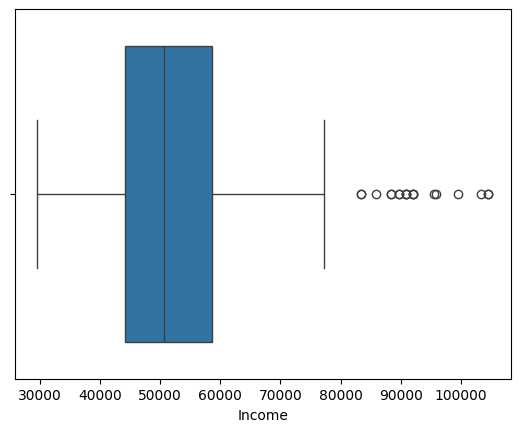

In [26]:
sns.boxplot(x = 'Income', data = df)

• As we see there are outliers in the 'Income' column.

• All values > 80581.75 (upper bound) are outliers in the 'Income' column.


In [27]:
(len(df.loc[df['Income'] > upper_bound])/len(df))*100

10.555555555555555

**Insight :**
10.5% values in Income column are outliers but we choose not to drop them as these values may required to draw some valuable insights and it may be useful for customer profiling.


# **Miles Column**
Like 'Income' we can perform same steps to find outliers in 'Miles' column

In [28]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [29]:
q1=np.percentile(df['Miles'],25)
q3=np.percentile(df['Miles'],75)
IQR=q3-q1
print('q1 = ',q1)
print('q3 = ',q3)
print('IQR = ', IQR)

q1 =  66.0
q3 =  114.75
IQR =  48.75


In [30]:
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print('Upper bound = ', upper_bound)
print('Lower bound = ', lower_bound)


Upper bound =  187.875
Lower bound =  -7.125


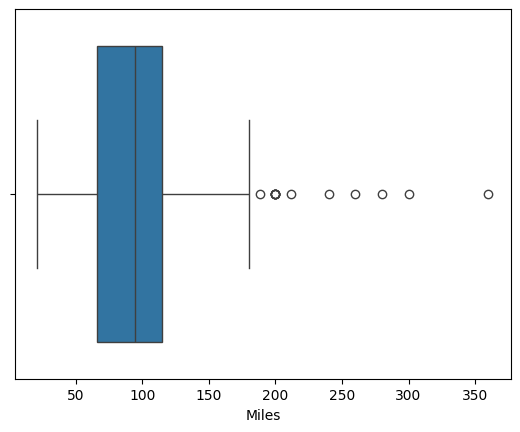

In [31]:
sns.boxplot(x= 'Miles', data=df)
plt.show()

**Insights :**

*   As we see there are outliers in the 'Miles' column.
*   All values > 187.875 (upper bound) are outliers in the 'Miles' column.




In [32]:
(len(df.loc[df['Miles'] > upper_bound])/len(df))*100

7.222222222222221

**Insight :**

7.22% values in 'Miles' column are outliers but we choose not to drop them as these values may required to draw some valuable insights and it may be useful for customer profiling.


# **Outlier detection using the z-score:**



*  We can detect outliers in numeric column using the z-score.
*  If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

*  z score = (x-mean)/std.deviation.



In [33]:
outliers = {}
for col in df.select_dtypes(include = np.number):

  #finding z-score for each value in a column
  z_score = np.abs((df[col] - df[col].mean()))/df[col].std()

  # if the z score of a value is a grater than 3 than the value is outlier
  column_outliers=df[z_score > 3][col]

  outliers[col]=column_outliers

for col, outlier_values in outliers.items():
  print(f"Outliers for {col} column")
  print(outlier_values)
  print()

Outliers for Age column
79    50
Name: Age, dtype: int64

Outliers for Education column
157    21
161    21
175    21
Name: Education, dtype: int64

Outliers for Usage column
163    7
166    7
Name: Usage, dtype: int64

Outliers for Fitness column
Series([], Name: Fitness, dtype: int64)

Outliers for Income column
168    103336
174    104581
178    104581
Name: Income, dtype: int64

Outliers for Miles column
166    300
167    280
170    260
173    360
Name: Miles, dtype: int64



**Insights**


*   The absence of outliers in the 'Fitness' column suggests that all customers fall within a reasonable range of self-rated fitness levels.

*   The outliers in the 'Income' column indicate that a few customers have much higher incomes compared to the rest.


*   The outliers in the 'Miles' column suggest that some customers expect to walk or run significantly more miles per week than others.


# **Adding New columns - Income group and Age group**
**Age group**

To gain valuable insights, it is essential to categorize the age column into distinct groups, such as young, middle-aged, and old. It will allow us to understand the customer purchase behaviour.

In [34]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [35]:
df['Age group'] = pd.cut(df['Age'],bins = [17,29,39,50], labels = ['Young', 'Middle-age', 'Old'])

**Age Groups**

18 - 29 : Young

30 - 39 : Middle-aged

40 - 50 : Old

In [36]:
df['Age group'].value_counts()

Age group
Young         113
Middle-age     50
Old            17
Name: count, dtype: int64

**Income group**

Similary we will catgroize 'Income' values into 3 groups 'Low', 'Medium' ,'High'. It will not only allow us to gain valuable insight but also help in customer profiling.

In [37]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [38]:
df['Income group'] = pd.cut(df['Income'], bins=[29000,50000,75000,105000], labels = ['Low','Medium','High'])

**Income groups**

29000 - 50000: Low

51000 - 75000: Medium

76000 - 105000: High

In [39]:
df['Income group'].isnull().sum()

0

In [40]:
df['Income group'].value_counts()

Income group
Low       83
Medium    76
High      21
Name: count, dtype: int64

In [41]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Low


# **Univariate Anylisis**

# **Categorical Columns**

# **Distribution of Treadmills among Aerofit Customers**

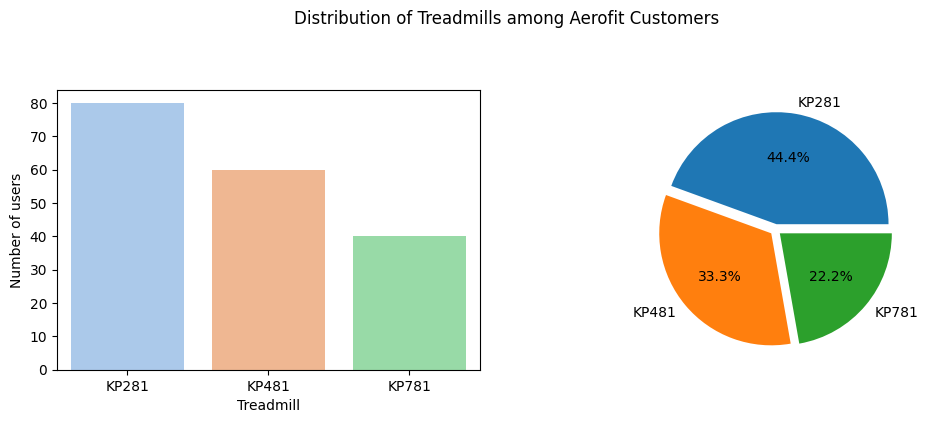

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(x = df['Product'],palette = 'pastel', data = df)
plt.xlabel('Treadmill')
plt.ylabel('Number of users')
plt.subplot(2,2,2)
plt.pie(df['Product'].value_counts(), labels = df['Product'].unique(),explode =(0.05,0.05,0.05),autopct='%1.1f%%')
plt.suptitle('Distribution of Treadmills among Aerofit Customers')
plt.show()

**Insights:**



*   Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.

*   KP281, being an entry-level and more affordable treadmill compared to the others, is the preferred choice among the majority of customers.

*   33.3% of customers favor the KP481 treadmill, drawn by its ideal fit for mid-level runners and its excellent value-for-money offering.

*   KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of customers.

**Recommendations:**



*   Emphasize the budget-friendly nature of the KP281 treadmill to attract more customers.

*   Highlight the key features of the KP281 that make it a great entry-level option for fitness enthusiasts.

*   Provide special offers or discounts to further entice customers looking for a cost-effective option.

*   Engage with fitness communities online to showcase the KP281's appeal to beginners.

*   Focus marketing efforts on reaching out to mid-level runners, emphasizing how the KP481 is tailored to meet their specific fitness needs and goals.
*   Showcase the competitive pricing and the outstanding features of the KP481 that make it a cost-effective choice for customers.

*   Launch targeted marketing campaigns to increase awareness and interest in the KP781 among potential customers who may value its advanced capabilities. Utilize various channels such as social media, fitness forums, and influencer collaborations.

*   Emphasize the unique features and benefits of the KP781 to justify its higher price. Highlight its advanced functionalities and how they enhance the workout experience, making it worth the investment.

# **Distribution of Gender among Aerofit Customers**

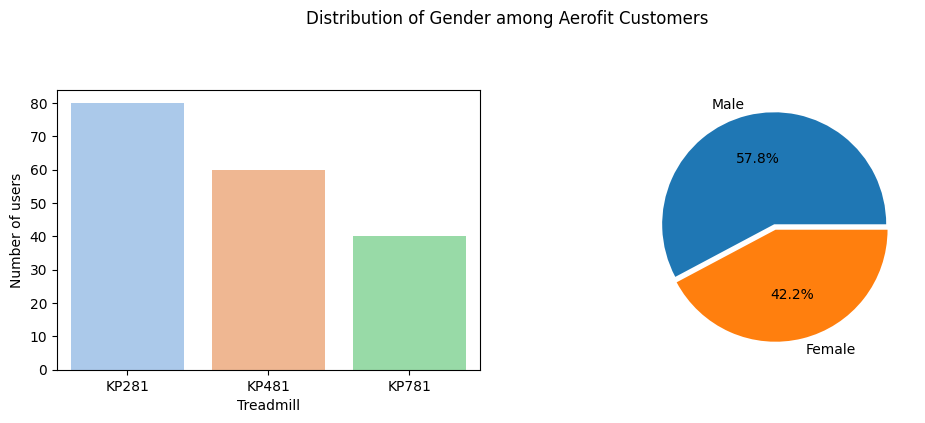

In [43]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(x = df['Product'],palette = 'pastel', data = df)
plt.xlabel('Treadmill')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].unique(),explode =(0.05,0), autopct='%1.1f%%')
plt.suptitle('Distribution of Gender among Aerofit Customers')

plt.show()

**Insight**: Aerofit has 57.78% male customers and 42.22% female customers.

**Recommendations:**

  

*   Create targeted advertisements and promotions that appeal to women, showcasing how fitness can positively impact their lives.

*   Showcase the female-friendly features and benefits of Aerofit treadmills to attract more female customers.

*   Offer a diverse selection of treadmill models that cater to various fitness levels and preferences.


# **Distribution of Martial status of among Aerofit Customers**

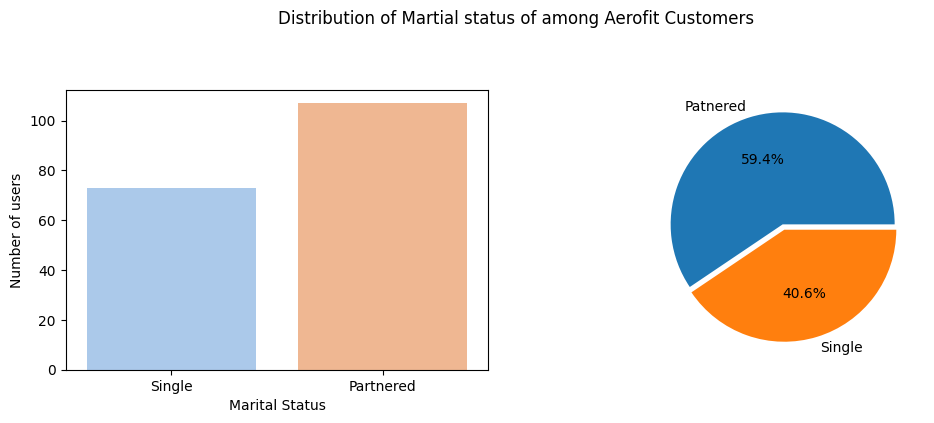

In [44]:
plt.figure(figsize =(12,8))

plt.subplot(2,2,1)
sns.countplot(data =df , x = 'MaritalStatus', palette = 'pastel')
plt.xlabel('Marital Status')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['MaritalStatus'].value_counts(), labels = ['Patnered','Single'], explode =(0.05,0), autopct='%1.1f%%')

plt.suptitle('Distribution of Martial status of among Aerofit Customers')
plt.show()

**Insight:** 59.4% of Aerofit customers are married, while 40.6% are single.


# **Distribution of Age-group across Aerofit Customers**

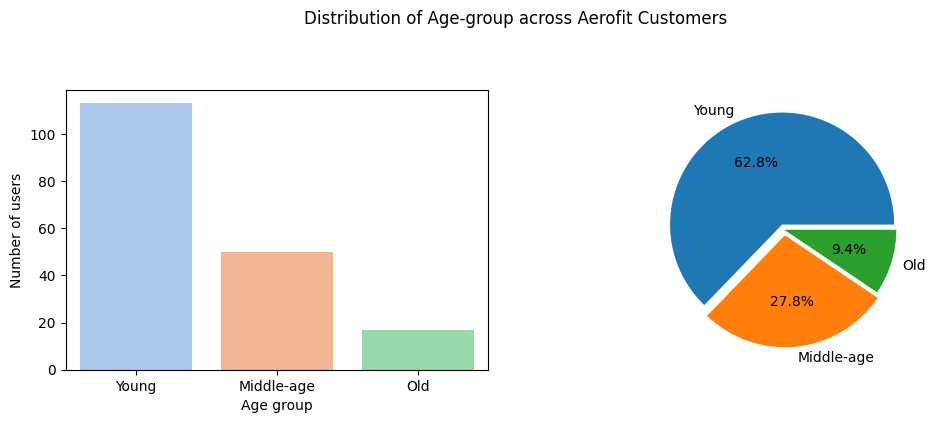

In [45]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Age group', palette = 'pastel')
plt.xlabel('Age group')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['Age group'].value_counts(), labels = df['Age group'].unique(), explode =(0.05,0.05,0), autopct='%1.1f%%')

plt.suptitle('Distribution of Age-group across Aerofit Customers')
plt.show()

**Insights:**


*   Most of the Aerofit customer falls under young age-group (18-29).

*   27.78% of middle-aged(30-39) users prefer to use the Aerofit Treadmills.

*   9.4% of users in the old (40-50) age group prefer purchasing Aerofit treadmills.


**Recommendations:**

Offer personalized assistance to help customers aged 40-50 select the ideal treadmill model, providing them with the tools to maintain an active and healthy lifestyle. With Aerofit's expert guidance, customers can feel confident and motivated to make the most of their treadmills effectively.


# **Distribution of Income group**

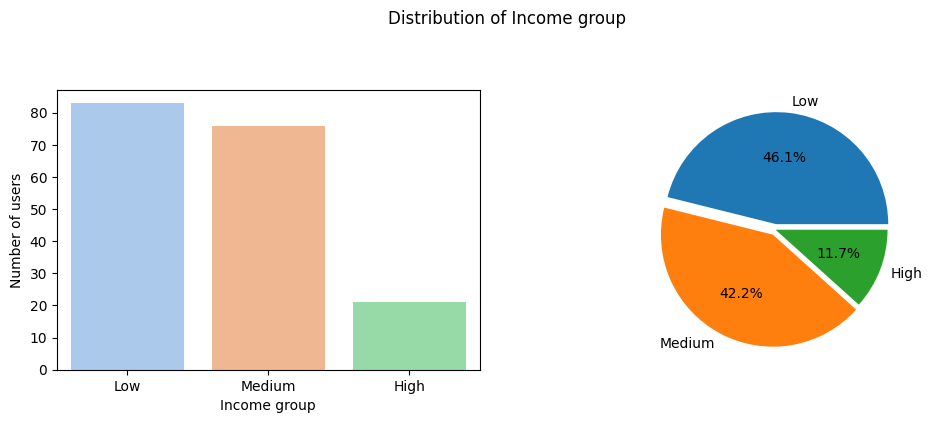

In [46]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Income group', palette = 'pastel')
plt.xlabel('Income group')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['Income group'].value_counts(), labels = df['Income group'].unique(), explode =(0.05,0.05,0), autopct='%1.1f%%')

plt.suptitle('Distribution of Income group')
plt.show()

**Insights:**
*   Approximately 88% of Aerofit customers belong to the low-income (29000-50000 USD) and medium-income (51000-75000 USD) groups.

*   Remaining 11.67% belongs to High income group (above 75000 usd).

**Recommendations:**
*   Showcase the advanced features and premium quality of the KP781 treadmill, catering to the discerning needs of high-income customers.

*   Highlight how the KP781 enhances their fitness experience with cutting-edge technology and superior performance.

*   Offer exclusive incentives, such as personalized consultations and extended warranties, to attract and reward this income group for choosing the top-of-the-line KP781 treadmill.


# **Numeric columns**


# **Distribution of Age**

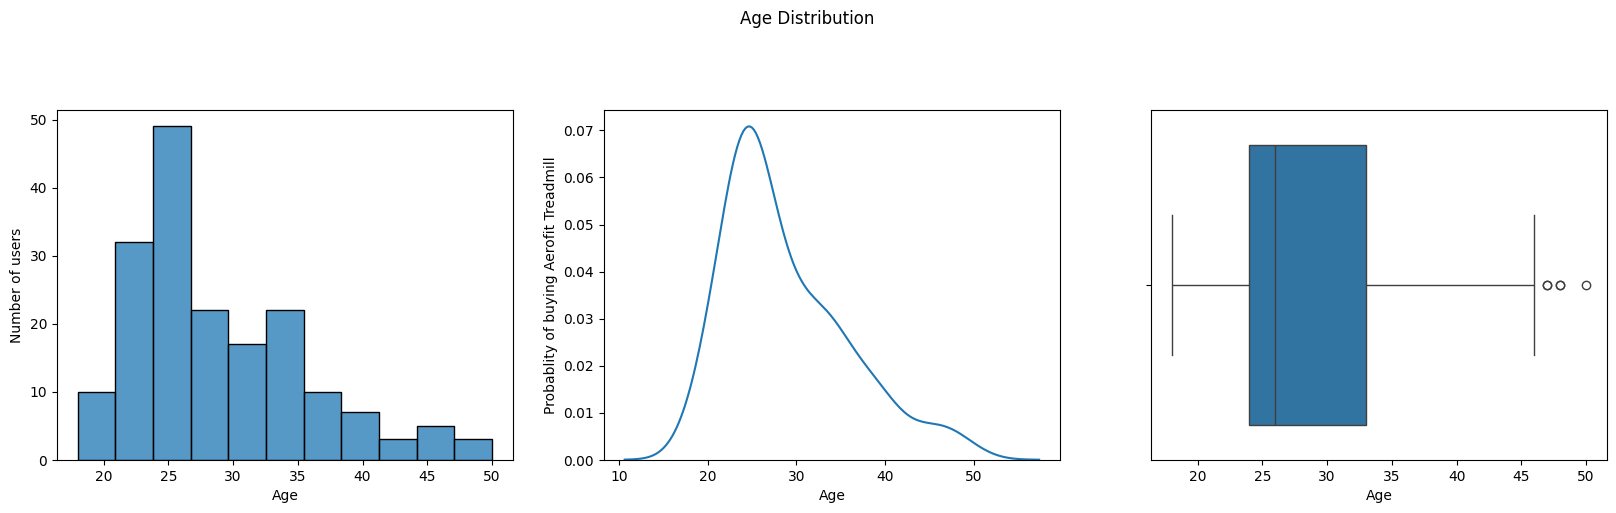

In [47]:
plt.figure(figsize=(20,10))

#Histogram
plt.subplot(2,3,1)
sns.histplot(data = df, x = 'Age')
plt.xlabel('Age')
plt.ylabel('Number of users')

#KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data = df, x = 'Age')
plt.xlabel('Age')
plt.ylabel('Probablity of buying Aerofit Treadmill')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Age')
plt.suptitle('Age Distribution')
plt.show()

**Insights:**

*   The majority of Aerofit customers belong to the age group of 18-30, and there is a high probability of them purchasing Aerofit treadmills.

*   There are very few users in the age group of 40-50, and the probability of them buying Aerofit treadmills is significantly low.


# **Distribution of Income**

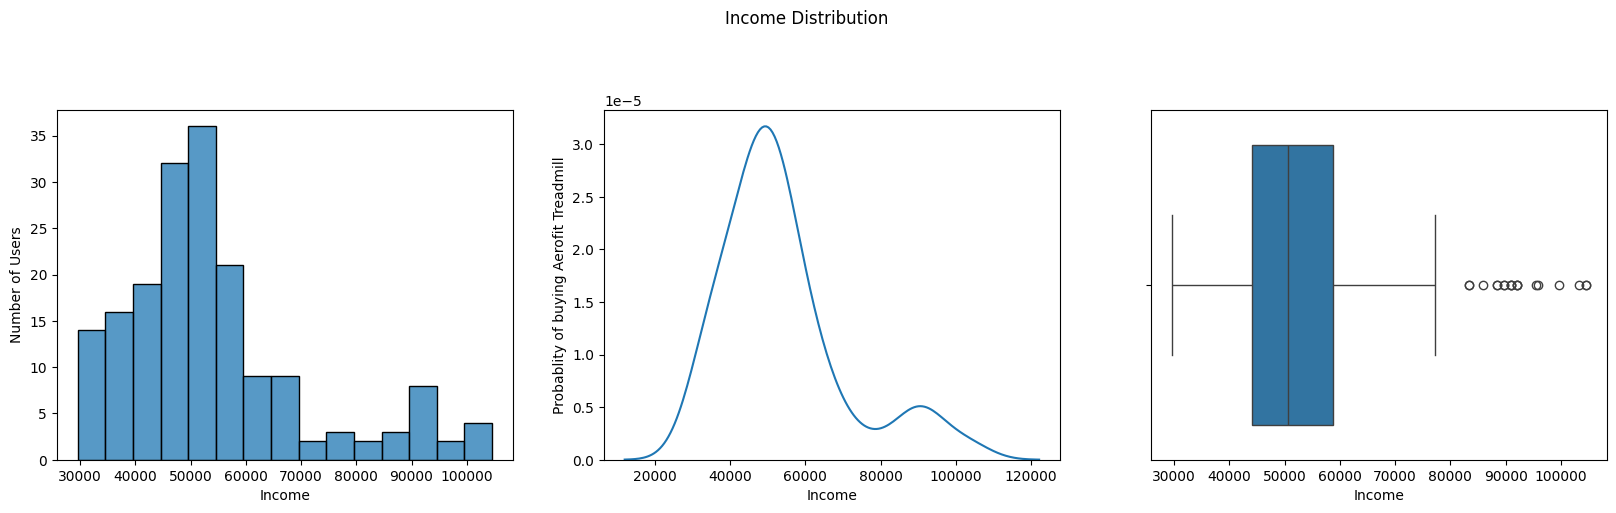

In [48]:
plt.figure(figsize=(20,10))

#Histogram
plt.subplot(2,3,1)
sns.histplot(data = df, x ='Income')
plt.xlabel('Income')
plt.ylabel('Number of Users')

#KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data = df, x = 'Income')
plt.xlabel('Income')
plt.ylabel('Probablity of buying Aerofit Treadmill')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Income')
plt.suptitle('Income Distribution')
plt.show()

**Insights:**
*   The majority of Aerofit customers fall within the income range of 40000-60000, and there is a high probability of them purchasing Aerofit treadmills.

*   Surprisingly, customers with an income greater than 80000 have a significantly lower likelihood of buying Aerofit treadmills.

# **Distribution of Education**

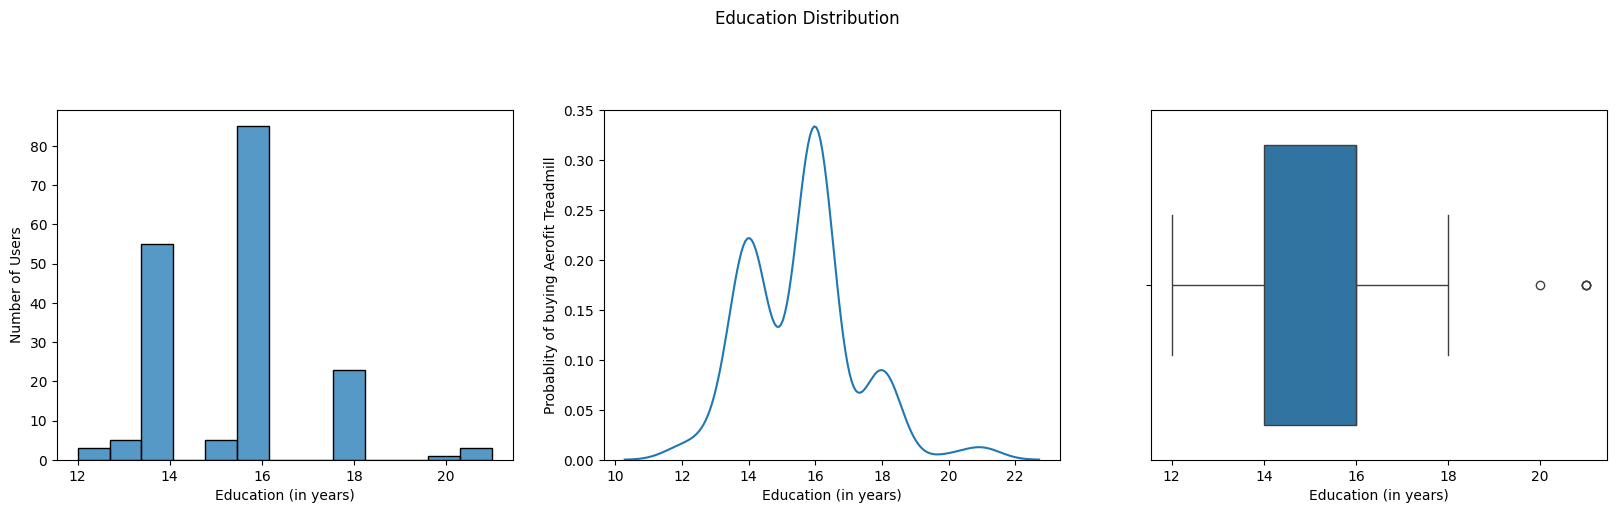

In [49]:
plt.figure(figsize=(20,10))

#Histogram
plt.subplot(2,3,1)
sns.histplot(data = df, x = 'Education')
plt.xlabel('Education (in years)')
plt.ylabel('Number of Users')

#KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data = df, x = 'Education')
plt.xlabel('Education (in years)')
plt.ylabel('Probablity of buying Aerofit Treadmill')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Education')
plt.xlabel('Education (in years)')
plt.suptitle('Education Distribution')
plt.show()

**Insights:**
*   Customers with 16 years of education are the primary purchasers of Aerofit treadmills.

*   Customers with education greater than 18 years have a significantly lower probablity of purchasing the Aerofit treadmills.
Distribution of Fitness Levels


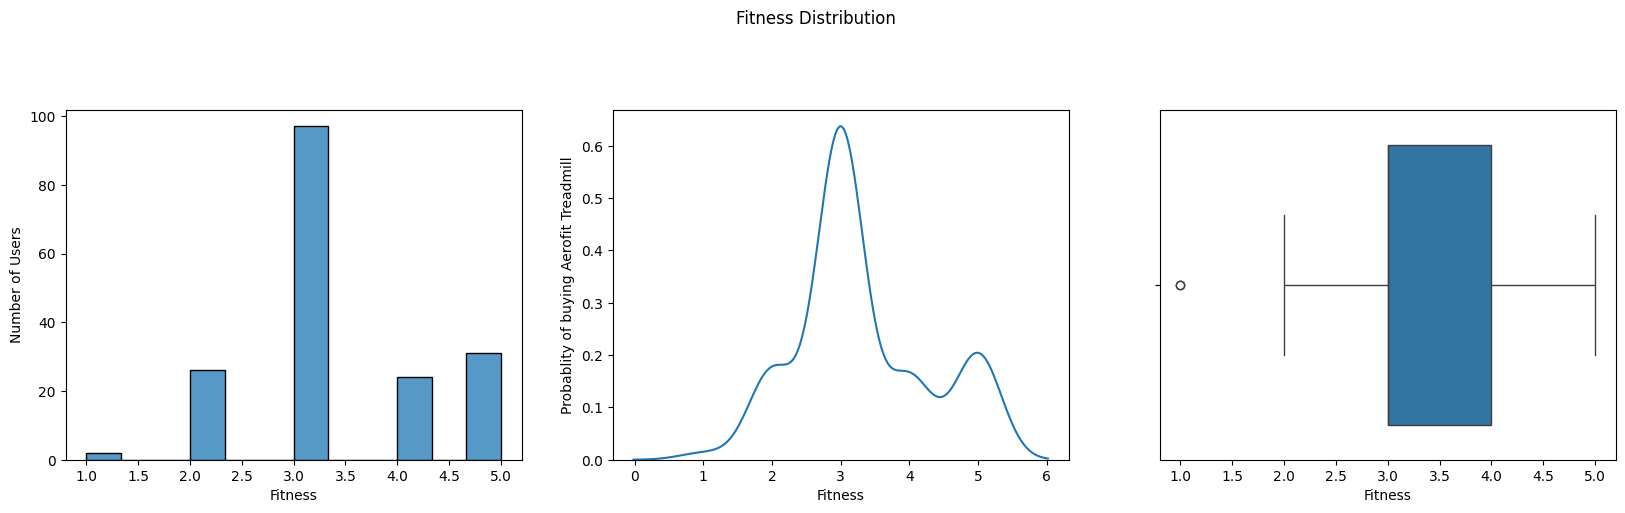

In [50]:
plt.figure(figsize=(20,10))

#Histogram
plt.subplot(2,3,1)
sns.histplot(data = df, x = 'Fitness')
plt.xlabel('Fitness')
plt.ylabel('Number of Users')

#KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data = df, x = 'Fitness')
plt.xlabel('Fitness')
plt.ylabel('Probablity of buying Aerofit Treadmill')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Fitness')
plt.xlabel('Fitness')
plt.suptitle('Fitness Distribution')
plt.show()

**Insights:**
*   Customers with 16 years of education are the primary purchasers of Aerofit treadmills.

*   Customers with education greater than 18 years have a significantly lower probablity of purchasing the Aerofit treadmills.



# **Distribution of Fitness Levels**

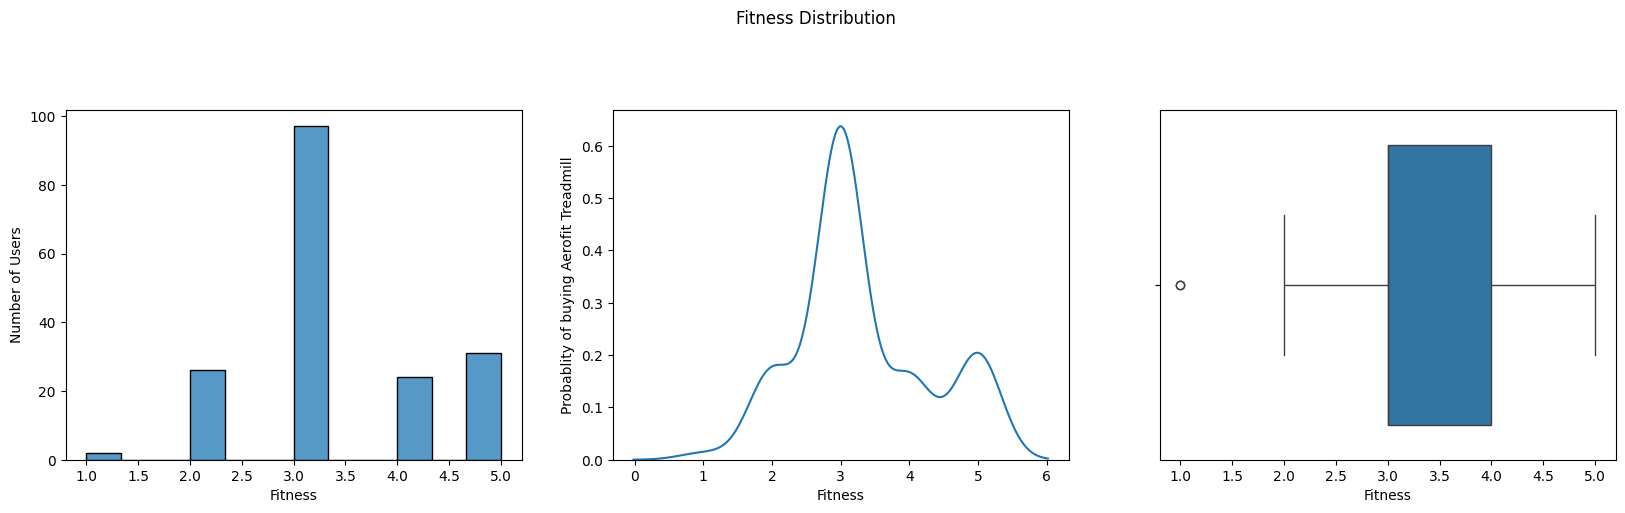

In [51]:
plt.figure(figsize=(20,10))

#Histogram
plt.subplot(2,3,1)
sns.histplot(data = df, x = 'Fitness')
plt.xlabel('Fitness')
plt.ylabel('Number of Users')

#KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data = df, x = 'Fitness')
plt.xlabel('Fitness')
plt.ylabel('Probablity of buying Aerofit Treadmill')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Fitness')
plt.xlabel('Fitness')
plt.suptitle('Fitness Distribution')
plt.show()

**Insight:** The majority of Aerofit cutomers possess fitness level 3, which aligns with a high likelihood of them purchasing treadmills.

# **Distribution of Usage**

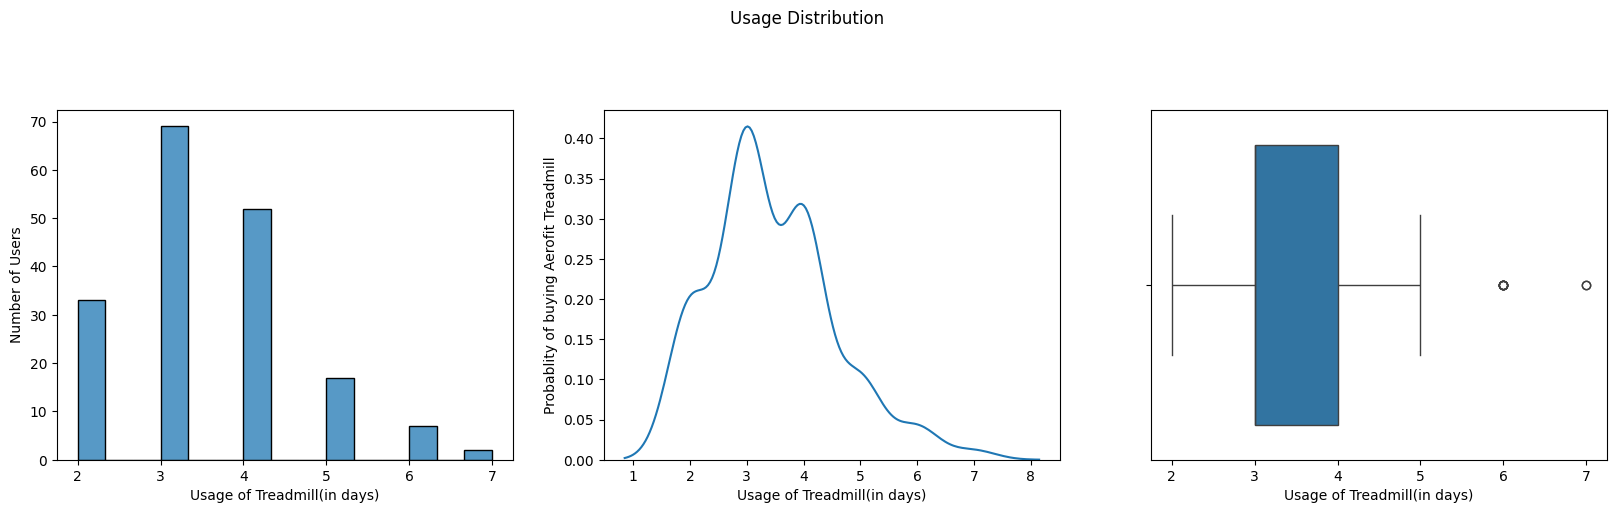

In [52]:
plt.figure(figsize=(20,10))

#Histogram
plt.subplot(2,3,1)
sns.histplot(data = df, x = 'Usage')
plt.xlabel('Usage of Treadmill(in days)')
plt.ylabel('Number of Users')

#KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data = df, x = 'Usage')
plt.xlabel('Usage of Treadmill(in days)')
plt.ylabel('Probablity of buying Aerofit Treadmill')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Usage')
plt.xlabel('Usage of Treadmill(in days)')
plt.suptitle('Usage Distribution')
plt.show()

**Insight:** The majority of customer user treadmills three times a week, indicating a higher probability of them purchasing a treadmill from Aerofit.

# **Distribution of Miles**

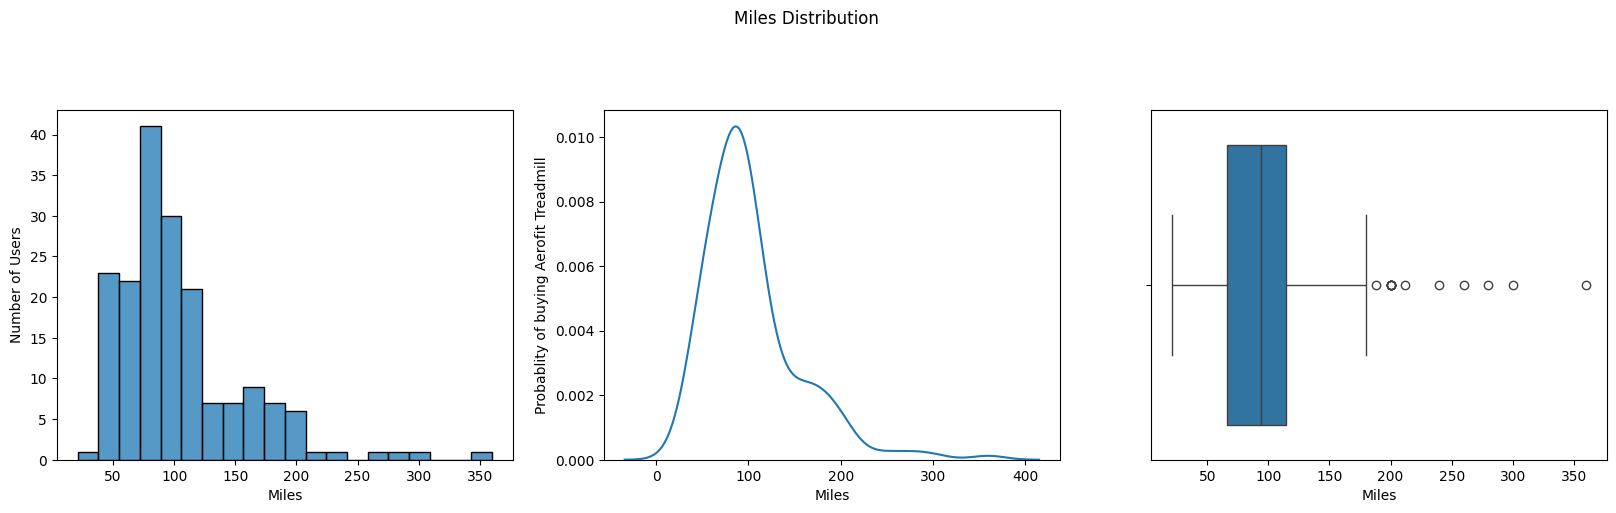

In [53]:
plt.figure(figsize=(20,10))

#Histogram
plt.subplot(2,3,1)
sns.histplot(data = df, x = 'Miles')
plt.xlabel('Miles')
plt.ylabel('Number of Users')

#KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data = df, x = 'Miles')
plt.xlabel('Miles')
plt.ylabel('Probablity of buying Aerofit Treadmill')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Miles')
plt.xlabel('Miles')
plt.suptitle('Miles Distribution')
plt.show()

**Insights:**
*   Customers who run 90-100 miles per week show a preference for using Aerofit treadmills.

*   Hardcore runners, averaging 200-250 miles per week, tend to prefer jogging over using Aerofit treadmills.

# **Descriptive statistics of numeric columns**

In [54]:
for col in df.select_dtypes(np.number):
  mean=df[col].mean().round(2)
  standard_deviation=df[col].std().round(2)
  median=df[col].median().round(2)
  minimum=df[col].min()
  maximum=df[col].max()
  q1=np.percentile(df[col],25)
  q3=np.percentile(df[col],75)
  IQR=q3-q1
  upper_bound=q3+1.5*IQR
  lower_bound=q1-1.5*IQR
  print(f'--- Descrtiption of {col} column ---')
  print(f'Mean: {mean}')
  print(f'Standard Deviation: {standard_deviation}')
  print(f'Median: {median}')
  print(f'Minimum: {minimum}')
  print(f'Maximum: {maximum}')
  print(f'25th Percentile: {q1}')
  print(f'75th Percentile: {q3}')
  print(f'IQR: {IQR}')
  print(f'Upper Bound: {upper_bound}')
  print(f'Lower Bound: {lower_bound}')
  print()

--- Descrtiption of Age column ---
Mean: 28.79
Standard Deviation: 6.94
Median: 26.0
Minimum: 18
Maximum: 50
25th Percentile: 24.0
75th Percentile: 33.0
IQR: 9.0
Upper Bound: 46.5
Lower Bound: 10.5

--- Descrtiption of Education column ---
Mean: 15.57
Standard Deviation: 1.62
Median: 16.0
Minimum: 12
Maximum: 21
25th Percentile: 14.0
75th Percentile: 16.0
IQR: 2.0
Upper Bound: 19.0
Lower Bound: 11.0

--- Descrtiption of Usage column ---
Mean: 3.46
Standard Deviation: 1.08
Median: 3.0
Minimum: 2
Maximum: 7
25th Percentile: 3.0
75th Percentile: 4.0
IQR: 1.0
Upper Bound: 5.5
Lower Bound: 1.5

--- Descrtiption of Fitness column ---
Mean: 3.31
Standard Deviation: 0.96
Median: 3.0
Minimum: 1
Maximum: 5
25th Percentile: 3.0
75th Percentile: 4.0
IQR: 1.0
Upper Bound: 5.5
Lower Bound: 1.5

--- Descrtiption of Income column ---
Mean: 53719.58
Standard Deviation: 16506.68
Median: 50596.5
Minimum: 29562
Maximum: 104581
25th Percentile: 44058.75
75th Percentile: 58668.0
IQR: 14609.25
Upper Bound: 8

# **Bivariate Analysis**

# **Discriptive of gender across each Treadmill**

In [55]:
#Counting the number of customers for each gender in each product group

gender_df = df.groupby(['Product','Gender']).size().unstack()
gender_df

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


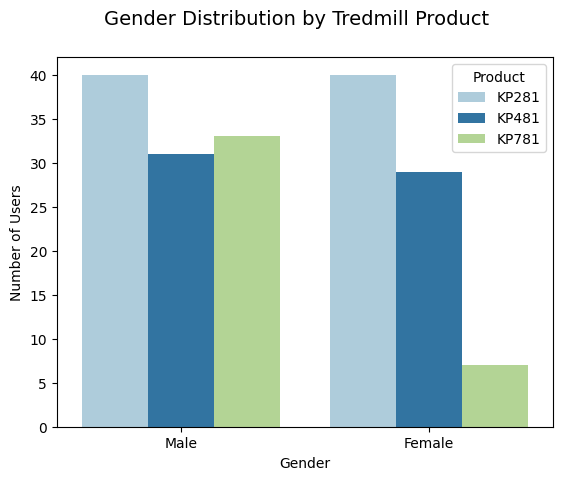

In [56]:
sns.countplot(data=df, x = 'Gender', hue = 'Product', palette='Paired')
plt.suptitle('Gender Distribution by Tredmill Product', fontsize = 14)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

**Insights:**
*   Both male and female customers prefer using the KP281 treadmill due to its entry-level status and cost-effectiveness compared to the other two options.

*   Both male and female customers equally prefer the KP481 treadmill as it offers the best value for money among the other two options.

*   Among male customers, the KP781 treadmill is the most preferred due to its advanced features following the KP281. However, the number of female customers using the KP781 treadmill is very low, possibly due to its higher cost compared to the other options.


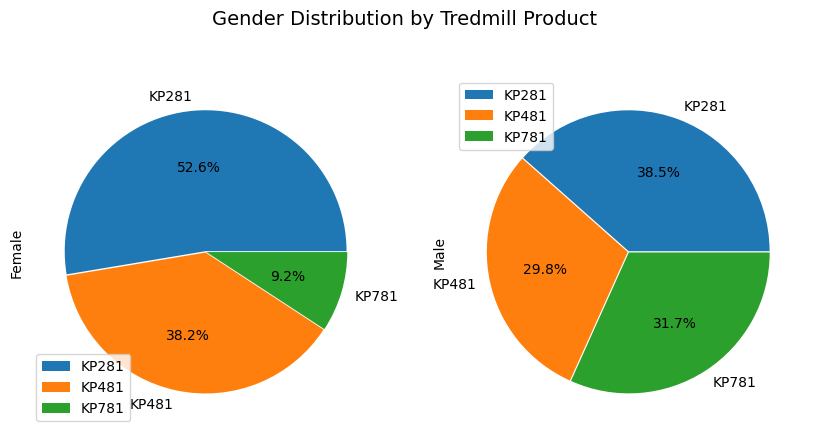

In [57]:
gender_df.plot(kind='pie', subplots = True, figsize = (10,5), explode = (0.005,0.005,0.005), autopct='%1.1f%%')
plt.suptitle('Gender Distribution by Tredmill Product', fontsize = 14)
plt.show()

**Insights:**

*   Among male customers, 38.5% prefer KP281 as an entry-level and cost-effective option. Meanwhile, 29.8% opt for KP481 due to its value for money proposition, and 31.7% favor KP781 for its advanced features.

*   Among female customers, 52.6% prefer KP281 as an entry-level and cost-effective option. Additionally, 38.2% opt for KP481 due to its value for money proposition, while only 9.2% favor KP781 due to its higher cost compared to the other two options.



# **Distribution of Martial Status among customers who purchased each treadmill**

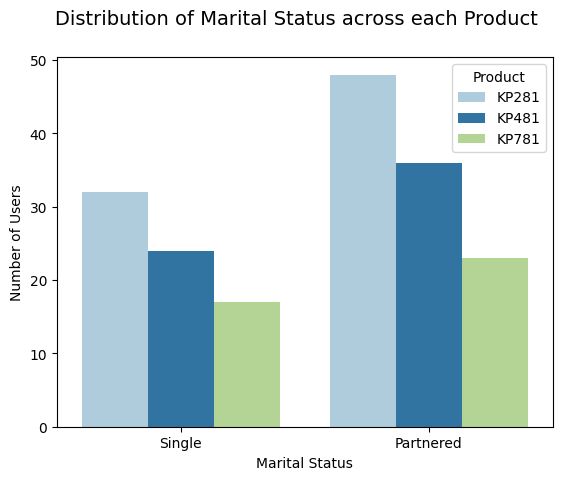

In [58]:
sns.countplot(data = df, x = 'MaritalStatus', hue = 'Product', palette = 'Paired')
plt.suptitle('Distribution of Marital Status across each Product', fontsize = 14)
plt.xlabel('Marital Status')
plt.ylabel('Number of Users')
plt.show()

**Insights:**
*   Married customers have a higher frequency of purchasing all treadmills compared to single customers.

*   The trend observed among both married and single customers reflects that KP281, being an entry-level treadmill, is the most frequently purchased gotion, while KP781, due to its higher cost, remains the least popular choice for both customer groups.

*   The purchase frequency for both married and single customers follows the trend of KP281 > KP481 > KP781, with KP281 being the most frequently purchased treadmill and KP781 being the least frequently purchased one.



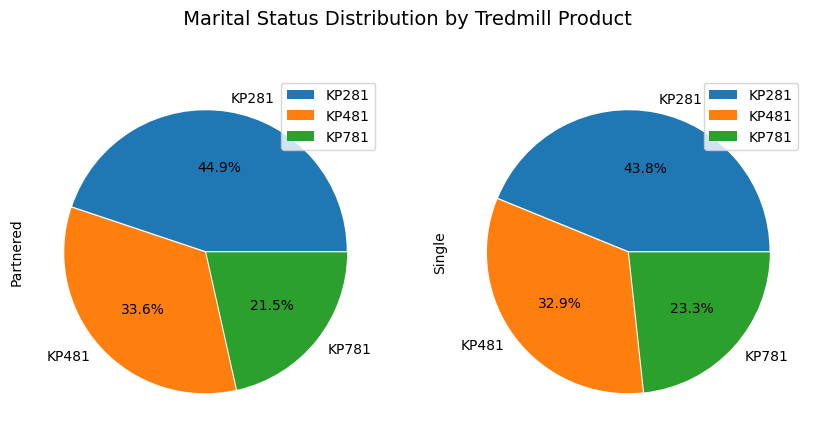

In [59]:
#Counting the number of customers for each marital status in each product group
MaritialStatus_df = df.groupby(['Product','MaritalStatus']).size().unstack()

#Pie charts indicating the distribution
MaritialStatus_df.plot(kind='pie', subplots = True, figsize = (10,5), explode = (0.005,0.005,0.005), autopct='%1.1f%%')
plt.suptitle(' Marital Status Distribution by Tredmill Product', fontsize = 14)
plt.show()

**Insights:**
*   Among married customers, the purchase distribution for Arofit treadmills is as follows: 44.9% prefer KP281, 33.6% prefer KP481, and the remaining 21.7% prefer KP781.

*   Among single customers, the purchase distribution for Aerofit treadmills is as follows: 43.8 % prefer KP281, 32.9% prefer KP481, and the remaining 23.3% pefer KP781.

# **Distribution of Age group for each Treadmill**

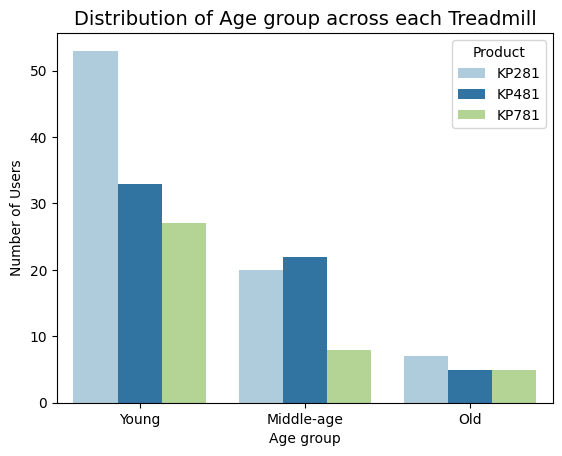

----Age groups----
18-29: Young
30-39: Middle-aged
40-50: Old


In [60]:
sns.countplot(data = df, x = 'Age group', hue = 'Product', palette = 'Paired')
plt.title('Distribution of Age group across each Treadmill', fontsize = 14)
plt.xlabel('Age group')
plt.ylabel('Number of Users')
plt.show()
print('----Age groups----')
print('18-29: Young')
print('30-39: Middle-aged')
print('40-50: Old')

**Insights:**


*   The majority of young users prefer the KP281 treadmill over the other two options. However, there is a significant number of young people using the KP781 treadmill, likely drawn to its advanced features.

*   Surprisingly, among middle-aged customers, KP481 is the most popular compared to KP281, possibly due to its appeal to mid runners. However, only a few Liddle-aged customers prefer using the KP781 treadmill.

*   Among old customers, KP281 remains the best choice for them, while KP481 and KP781 are equally preferred. It is important to note that the number of old customers is significantly less compared to the other two age groups.


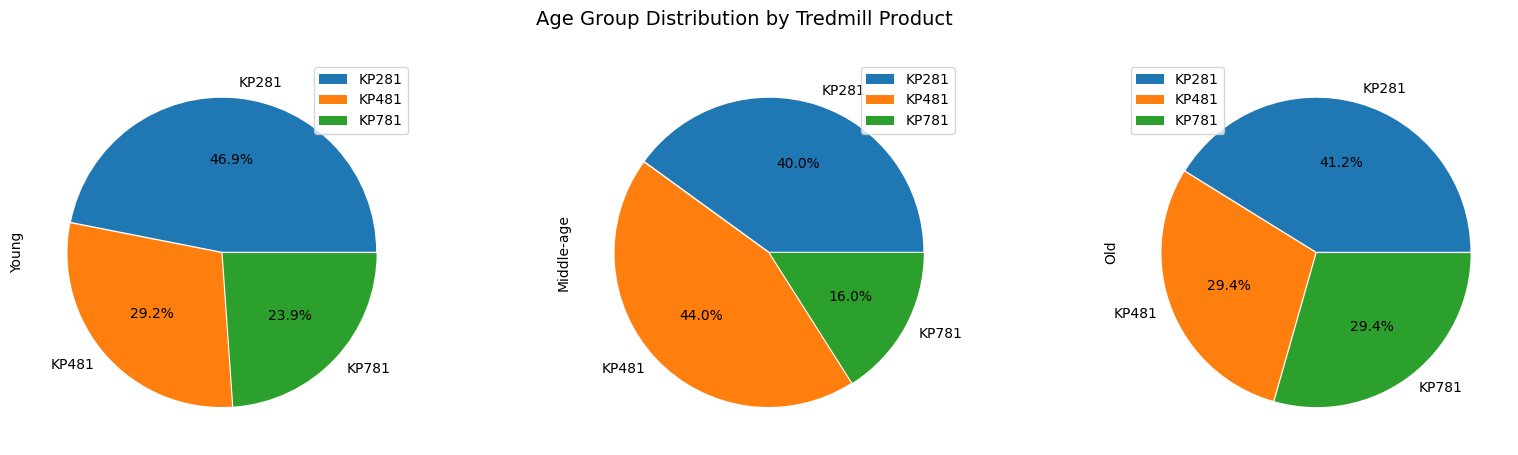

In [61]:
#Counting the number of customers for each marital status in each product group
AgeGroup_df = df.groupby(['Product','Age group']).size().unstack()

#Pie charts indicating the distribution
AgeGroup_df.plot(kind='pie', subplots = True, figsize = (20,5), explode = (0.005,0.005,0.005), autopct='%1.1f%%')
plt.suptitle('Age Group Distribution by Tredmill Product', fontsize = 14)
plt.show()

**Insights:**
*   Among young customers, the purchase distribution for Aerofit treadmills is as follows: 46.9% prefer KP281, 29.2% prefer KP481, and the remaining 23.9% prefer KP781.

*   Surprisingly, 44% of middle-aged customers prefer KP481 over the other two treadmills, while 40.0% prefer KP281, and only 16% prefer the KP781.

*   Among old customers, 41.2% prefer KP281, while 29.4% prefer both KP481 and KP781.

# **Distribution of Income-group across Treadmills**

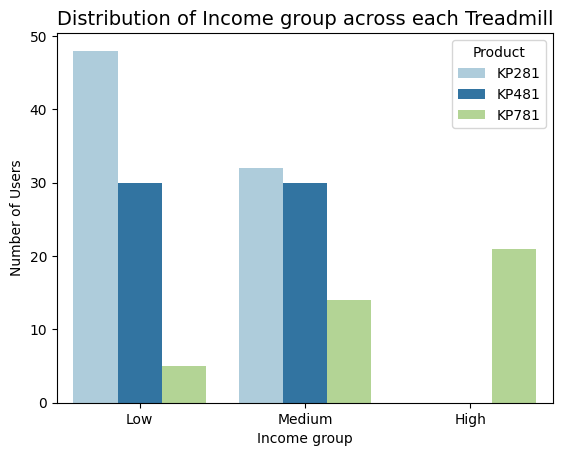

----Income groups----
29000-50000: Low
51000-75000: Medium
Above 75000: High


In [62]:
sns.countplot(data = df, x = 'Income group', hue = 'Product', palette = 'Paired')
plt.title('Distribution of Income group across each Treadmill', fontsize = 14)
plt.xlabel('Income group')
plt.ylabel('Number of Users')
plt.show()
print('----Income groups----')
print('29000-50000: Low')
print('51000-75000: Medium')
print('Above 75000: High')

**Insights:**
*   Customers belonging to the low-income group prefer KP281 due to its affordability compared to the other two treadmills. Additionally, around 30 customers from this income group have purchased KP481. However, only a few customers in this income group have chosen to purchase the more expensive KP781 treadmill.

*   Customers belonging to the middle-income group exhibit similar preference for both KP281 and KP481 treadmills, with a marginal difference in frequency.
*   Additionally, approximately 15-20 customers from this group have also purchased the more expensive KP781 treadmill.

*   Customers belonging to the high-income group exclusively prefer KP781 due to its advanced features and higher cost compared to the other two treadmills.



# **Distribution Miles and Education for each Treadmill**

In [63]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Low


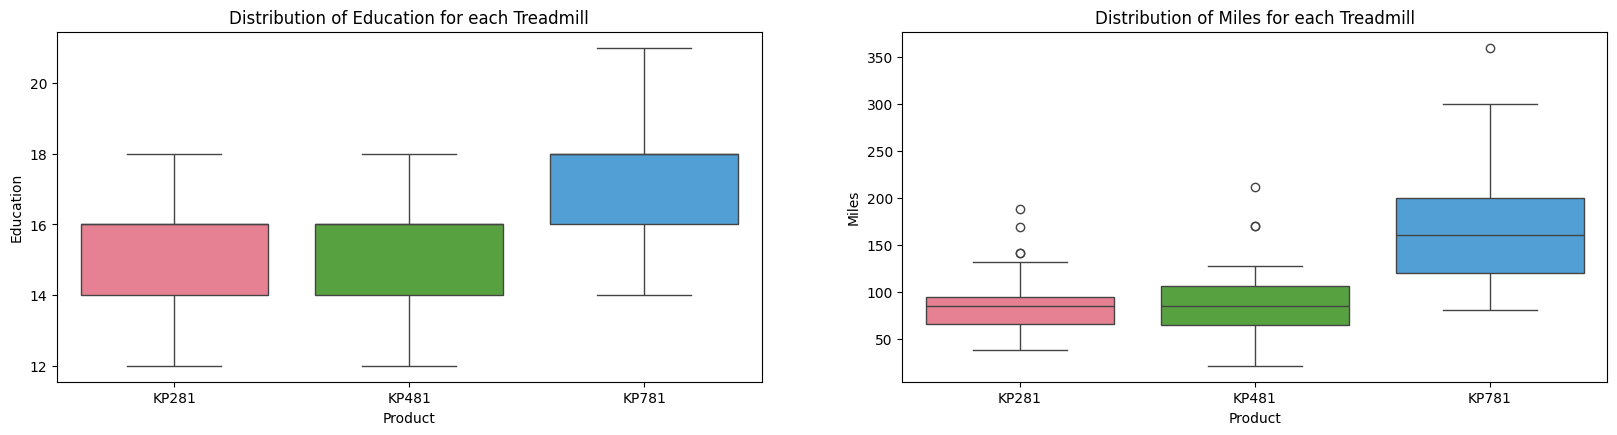

In [64]:
columns = ['Education','Miles']
plt.figure(figsize=(20,10))
for i,col in enumerate(columns,1):
  plt.subplot(2,2,i)
  sns.boxplot(data = df, x = 'Product', y = col, palette = 'husl')
  plt.title(f'Distribution of {col} for each Treadmill')
plt.show()

**Insights:**
*   Customers with 14-16 years of education prefer the KP281 and KP481 treadmills. However, among all treadmills, the majority of customers with 16-18 years of education prefer the KP781 treadmill.

*   Customers who run 60-100 miles per week prefer the KP281 treadmill, while mid runners who run 60-120 miles per week opt for the KP481. On the other hand, hardcore runners who run 120-200 miles per week prefer the KP781 treadmill due to its advanced features.

# **Distribution of Usage and Fitness across each Treadmill**

Text(0.5, 1.0, 'Distribution of Fitness across each Treadmill')

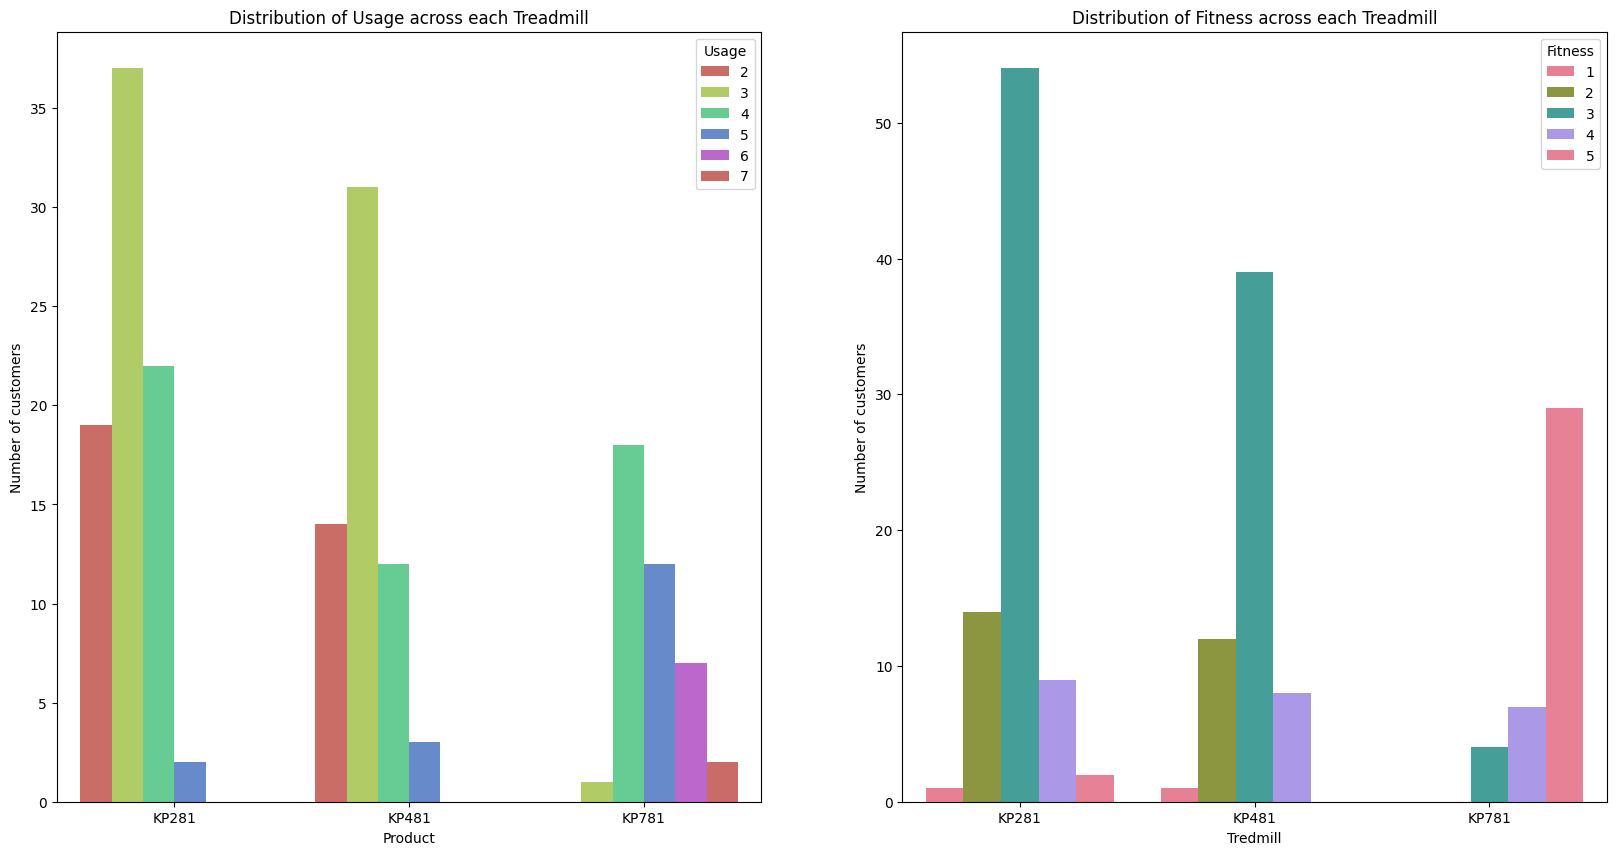

In [65]:
plt.figure(figsize=(20,10))

#Usage Column
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'Product', hue = 'Usage', palette = 'hls')
plt.xlabel('Product')
plt.ylabel('Number of customers')
plt.title('Distribution of Usage across each Treadmill')

#Fitness Column
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'Product', hue = 'Fitness', palette = 'husl')
plt.xlabel('Tredmill')
plt.ylabel('Number of customers')
plt.title('Distribution of Fitness across each Treadmill')

**Insights:**

1. Customers who use treadmills 3 times a week prefer both KP281 and KP481. However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.

2. Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.

# **Heatmap**

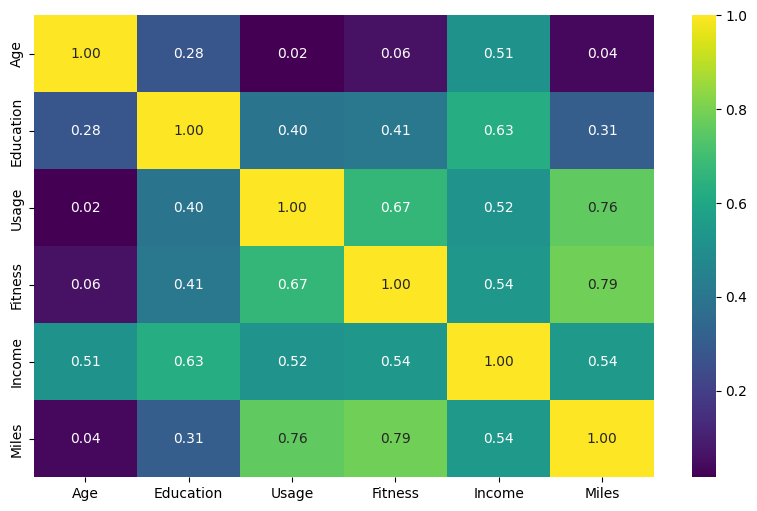

In [120]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()

**Insights:**
*   Age and Education:There is a positive correlation of approximately 0.28 between Age and Education. This indicates that as the customers' age increases, their education level tends to be higher.

*   Age and Income: There is a moderate positive correlatian of approximately 0.51 between Age and Income. This suggests that as the customers' age increases, their income tends to be higher.

*   Education and Income: There is a relatively strong positive correlation of approximately 0.63 between Education and Income. This suggests that customers with higher levels of education tend to have higher incomes.

*   Usage and Fitness: There is a strong positive correlation of approximately 0.67 between Usage and Fitness. This indicates that customers who plan to use the treadmill more frequently tend to have higher fitness levels.

*   Fitness and Miles: There is a strong positive correlation of approximately 0.79 between Fitness and Miles. This indicates that customers with higher fitness levels also expect to walk/run more miles per week.

*   Age and Fitness: There is a weak positive correlation of approximately 0.06 between Age and Fitness. Similar correlation can be observed with Age and Usage as well as Age and Miles.


# **Conditional and Marginal Probablities**

# **Impact of gender on purchasing the treadmill**

In [80]:
pd.crosstab(index = df['Product'], columns = df['Gender'], margins = True, margins_name = 'Total', normalize = True).round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


**Marginal Probablities**
*   P(KP281)= 0.44

*   P(KP481)= 0.33

*   P(kP781)= 0.22

*   P(Male) = 0.58

*   P(Female) = 0.42

---


**Conditional Probablities**

*   P(KP281 Male) = 0.22

*   P(KP281|Female) = 0.22

*   P(KP481|Male) = 0.17

*   P(KP481|Female) = 0.16

*   P(KP781|Male) = 0.18

*   P(KP781 Female) = 0.04


# **Impact of marital status on purchasing the Treadmill**

In [79]:
pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], margins = True, margins_name = 'Total', normalize = True).round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


**Marginal Probablities**
*   Р(КР281)= 0.44

*   Р(КР481)= 0.33

*   P(kP781)= 0.22

*   P(Patnered) = 0.59

*   P(Single) = 0.41


---


**Conditional Probablities:**
*   P(KP281|Partnered) = 0.27

*   P(KP281|Single) = 0.18

*   P(KP481|Partnered) = 0.20

*   P(KP481|Single) = 0.13

*   P(KP781|Partnered) = 0.13

*   P(KP781|Single) = 0.09

# **Impact of Age groups on purchasing the treadmill**

In [78]:
pd.crosstab(index = df['Product'], columns = df['Age group'], margins = True, margins_name = 'Total', normalize = True).round(2)

Age group,Young,Middle-age,Old,Total
Product,,,,
KP281,0.29,0.11,0.04,0.44
KP481,0.18,0.12,0.03,0.33
KP781,0.15,0.04,0.03,0.22
Total,0.63,0.28,0.09,1.00


**Age-groups:**
*   18-29: Young

*   30-39: Middle-aged

*   40-50: Old


---


**Marginal Probablities:**
*   P(KP281)= 0.44

*   P(KP481)= 0.33

*   P(kP781)= 0.22

*   P(Young) = 0.63

*   P(Middle-aged) = 0.28

*   P(Old) = 0.09


---



**Conditional Probablities:**
*   P(KP281|Young) = 0.29

*   P(KP281|Middle-aged) = 0.11

*   P(KP281|Old) = 0.04

*   P(KP481|Young) = 0.18

*   P(KP481|Middle-aged) = 0.12


---



**Aerofit-probablity-and-stats:**
*   P(KP481|Old) = 0.03

*   P(KP781|Young) = 0.15

*   P(KP781|Middle-aged) = 0.04

*   P(KP781|Old) = 0.03


# **Impact of Income groups on purchasing the treadmill**

In [75]:
pd.crosstab(index = df['Product'], columns = df['Income group'], margins = True, margins_name = 'Total', normalize = True).round(2)

Income group,Low,Medium,High,Total
Product,,,,
KP281,0.27,0.18,0.00,0.44
KP481,0.17,0.17,0.00,0.33
KP781,0.03,0.08,0.12,0.22
Total,0.46,0.42,0.12,1.00


**Income-groups:**
*   29000-50000 : Low

*   51000-75000 : Medium

*   76000-105000 : High


---


**Marginal Probablities:**
*   P(KP281)= 0.44

*   P(KP481)= 0.33

*   P(kP781)= 0.22

*   P(Low)= 0.46

*   P(Medium)= 0.42

*   P(High)= 0.12


---


**Conditional Probablities:**
*   P(KP281|Low) = 0.27

*   P(KP281|Medium) = 0.18

*   P(KP281|High) = 0.00

*   P(KP481|Low) = 0.17

*   P(KP481|Medium) = 0.17

*   P(KP481|High) = 0.00

*   P(KP781|Low) = 0.03

*   P(KP781|Medium) = 0.08

*   P(KP781|High)= 0.12


# **Additional Questions on conditional Probability**

**What is the probability that a customer has a specific fitness level (eg. fitness = 4) given that they purchased a particular treadmill product (KP281, KP481, KP781)?**

In [102]:
#Total nuber o customers
total = len(df)
products = ['KP281', 'KP481', 'KP781']
fitness_level = 4

#Calculate the probability for each product and fitness level
probabilities = {}
for product in products:

    #Calculating the number of customers who purchased the specific product
    total_poduct = len(df.loc[df['Product'] == product])

    #Calculating the number of customers who purchased the specific product and has fitness level 4
    total_product_fitness = len(df.loc[(df['Product'] == product) & (df['Fitness'] == fitness_level)])

    #Calculating the conditional probability
    conditional_probability = total_product_fitness/total_poduct

    #Storing the conditional probability in a dictionary
    probabilities[product] = conditional_probability

for product,probability in probabilities.items():
    print(f'Probability of customer having a fitness level {fitness_level} given that they purchased a {product}: {probability:.2f}')

Probability of customer having a fitness level 4 given that they purchased a KP281: 0.11
Probability of customer having a fitness level 4 given that they purchased a KP481: 0.13
Probability of customer having a fitness level 4 given that they purchased a KP781: 0.17


**What is the probability that a customer purchased a particular treadmill product (KP281, KP481, KP781) given that they runs 80 miles per week?**

In [106]:
# Total number of customers
total = len (df)
products = ['KP281', 'KP481', 'KP781']
miles = 80

#calculating the probablity for each product and fitness Level
probablities = {}
for product in products:

    #calculating the number of customers who purchased the specific product
    total_miles=len(df. loc[df['Miles']==miles])

    #calculating the number of customers who purchased the specific product and runs 80
    total_product_miles = len(df.loc[(df['Product']==product)&(df['Miles']==miles)])

    #calculating the conditional probablity
    conditional_probablity=total_product_miles/total_miles

    #storing the conditional probablity in the dictionary
    probablities[product] = conditional_probablity

for product, probablity in probablities.items():
  print(f'Probablity of customer purchased a (product) given that they runs a {miles} miles per week: {probablity:.2f}')

Probablity of customer purchased a (product) given that they runs a 80 miles per week: 0.00
Probablity of customer purchased a (product) given that they runs a 80 miles per week: 0.00
Probablity of customer purchased a (product) given that they runs a 80 miles per week: 1.00


**What is the probability that a customer purchased a particular treadmill product (KP281, KP481, KP781) given that they use treadmill 3 times in a week?**

In [112]:
# Total number of customers
total = len(df)
products = ['KP281', 'KP481', 'KP781']
usage = 3

#calculating the probablity for each product and fitness level
probablities= {}
for product in products:

  #calculating the number of customers who purchased the specific product
  total_usage = len(df.loc[df['Usage']==usage])

  #calculating the number of customers who purchased the specific product and uses tr
  total_product_miles = len(df.loc[(df['Product']==product)&(df['Usage']==usage)] )

  #calculating the conditional probablity
  conditional_probablity=total_product_miles/total_usage

  #storing the conditional probablity in the dictionary
  probablities[product] = conditional_probablity

for product, probablity in probablities.items():
  print(f'Probablity of customer purchased a {product} given that they uses treadmill {usage} times in a week: {probablity:.2f}')

Probablity of customer purchased a KP281 given that they uses treadmill 3 times in a week: 0.54
Probablity of customer purchased a KP481 given that they uses treadmill 3 times in a week: 0.45
Probablity of customer purchased a KP781 given that they uses treadmill 3 times in a week: 0.01


# **Customer Profiling**

**Potential Buyers for KP281 Treadmill**
1. Gender: Male and Female
2. Marital status: Both Partnered or single
3. Age:18-29 as probablity of old customers purchasing the KP281 is low
4. Income:29000-50000 USD as probability of customers belonging to high income group purchasing the KP281 treadmill is 0.
5. Education:14-16 years
6. Fitness level':3
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 60-100 miles per week


---


**Potential Buyers for KP481 Treadmill**
1. Gender: Both Male and Female
2. Marital status: Both Partnered or single
3. Age:18-39 years
4. Income:29000-75000 USD as probability of customers belonging to high income group purchasing the KP481 treadmill is 0.
5. Education:14-16 years
6. Fitness level':3
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 80-120 miles per week --> Mostly midrunners.


---


**Potential Buyers for KP781 Treadmill**
1. Gender: Only male customers as probablity of female customers buying KP781 is very low.
2. Marital status: Only married customers as probablity of single customers buying KP781 is also low.
3. Age:18-39 years
4. Income:75000-105000 USD as probability of customers belonging to low and middle-income groups purchasing the KP781 treadmill is very low.
5. Education:16-18 years
6. Fitness level':5
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 120 200 miles per week --> Mostly hardcore runners.


# **Insights**
1. Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill:
2. KP281, being an entry-level and more affordable treadmill compared to the others, is the preferred choice among the majority of customers.
3.33.3% of customers favor the KP481 treadmill, drawn by its ideal fit for mid-level runners and its excellent value-for-money offering.
4. KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of customers.
5. Aerofit has 57.78% male customers and 42.22% female customers.
6. Among male customers, 38.5% prefer KP281 as an entry-level and cost-effective option.
Meanwhile, 29.8% opt for KP481 due to its value for money proposition, and 31.7% favor KP781 for its advanced features.
7. Among female customers, 52.6% prefer KP281 as an entry-level and cost-effective option.
Additionally, 38.2% opt for KP481 due to its value for money proposition, while only 9.2% favor KP781 due to its higher cost compared to the other two options.
8. Probablity of female customers buying KP781 is 4% which is very low.
9. Both female and male customers equally prefers KP281 with probablity 22.2%.
10. Probablity of male customers buying KP481 is 17%
11. Probablity of female customers buying KP481 is 16% which is also good. 12.59.4% of Aerofit customers are married, while remaining 40.56% are single.
13. Married customers have a higher frequency of purchasing all treadmills compared to single customers.
14. The trend observed among both married and single customers reflects that KP281, being an entry-level treadmill, is the most frequently purchased option, while KP781, due to its higher cost, remains the least popular choice for both customer groups.
15. The purchase frequency for both married and single customers follows the trend of KP281 > KP481 > KP781, with KP281 being the most frequently purchased treadmill and KP781 being the least frequently purchased one.
16. The probability of single customers purchasing each of the treadmills is lower compared to that of married customers.
17. Most of the Aerofit customer falls under young age-group (18-29).
18. 27.78% of middle-aged(30-39) users prefer to use the Aerofit Treadmills.
19.9.4% of users in the old (40-50) age group prefer purchasing Aerofit treadmills.
20. Among young customers, the purchase distribution for Aerofit treadmills is as follows: 46.9% prefer KP281, 29.2% prefer KP481, and the remaining 23.9% prefer KP781.
21. Among middle-aged customers, suprisingly 44% prefer KP481 over the other two treadmills, while 40.0% prefer KP281, and only 16% prefer the KP781.
22. Among old customers, 41.2% prefer KP281, while 29.4% prefer both KP481 and KP781.
23. The probability of young customers buying the KP281 treadmill is 29%, while the probability of buying the KP481 treadmill is 18%, and the probability of buying the KP781 treadmill is 15%.
24. The probability of middle-aged customers buying the KP281 treadmill is 11%, while the probability of buying the KP481 treadmill is 12%, and the probability of buying the KP781 treadmill is 4%.
25. The probability of old customers buying the KP281 treadmill is 4%, while the probability of buying the KP481 treadmill is 3%, and the probability of buying the KP781 treadmill is 3%.
26. The probability of old customers purchasing each of the treadmills is lower compared to that of other age-group customers.
27. Approximately 88% of Aerofit customers belong to the low-income (29000-50000 USD) and medium-income (51000-75000 USD) groups. Remaining 11.67% belongs to High income group (above 75000 USD).
28. Due to its price of 2500 USD, the probability of customers belonging to the low-income and middle-income groups buying the KP781 treadmill is low compared to customers in the high-income group who can afford this higher-priced treadmill.
29. Customers belonging to the high-income group exclusively prefer KP781 due to its advanced features and higher cost compared to the other two treadmills.
30. Customers with 14-16 years of education prefer the KP281 and KP481 treadmills. However, among all treadmills, the majority of customers with 16-18 years of education prefer the KP781 treadmill.
31. Customers who run 60-100 miles per week prefer the KP281 treadmill, while mid runners who run 60-120 miles per week opt for the KP481. On the other hand, hardcore runners who run
120-200 miles per week prefer the KP781 treadmill due to its advanced features.
32. Customers who use treadmills 3 times a week prefer both KP281 and KP481. However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.
33. Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.



# **Recommendations**
**Actionable Insight: Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.**

1. Emphasize the budget-friendly nature of the KP281 treadmill to attract more customers.
2. Highlight the key features of the KP281 that make it a great entry-level option for fitness enthusiasts.
3. Provide special offers or discounts to further entice customers looking for a cost-effective option.
4. Engage with fitness communities online to showcase the KP281's appeal to beginners.
5. Focus marketing efforts on reaching out to mid-level runners, emphasizing how the KP481 is tailored to meet their specific fitness needs and goals.
6. Showcase the competitive pricing and the outstanding features of the KP481 that make it a cost-effective choice for customers.
7. Launch targeted marketing campaigns to increase awareness and interest in the KP781 among potential customers who may value its advanced capabilities. Utilize various channels such as social media, fitness forums, and influencer collaborations.
8. Emphasize the unique features and benefits of the KP781 to justify its higher price. Highlight its advanced functionalities and how they enhance the workout experience, making it worth the investment.

**Actionable Insight: The probability of female customers buying each of the treadmills compared to male customers is 42%:**
1. Create targeted advertisements and promotions that appeal to women, showcasing how fitness can positively impact their lives.
2. Showcase the female-friendly features and benefits of Aerofit treadmills to attract more female customers.
3. Offer a diverse selection of treadmill models that cater to various fitness levels and preferences.

**Actionable Insight: The probability of female customers buying the KP781 treadmill is 4%, which is significantly lower compared to that of male customers :**

Offer special incentives and discounts exclusively for female customers interested in purchasing the KP781 treadmill. This could include limited-time promotions, personalized offers, or package deals to make the treadmill more appealing and accessible to this customer segment. By providing targeted incentives, it can encourage more female customers to consider and invest in the KP781.

**Actionable Insight:The probability of single customers purchasing each of the treadmills is lower compared to that of married customers:**

1. Appoint Virat Kohli as the brand ambassador for Aerofit, promoting the brand's values of fitness, health, and well-being. Virat's association with Aerofit will resonate with single customers, inspiring them to prioritize their fitness goals and consider Aerofit treadmills as a valuable addition to their fitness routines.
2. Introduce exclusive offers and discounts for single customers as part of the collaboration with Virat Kohli. This can include special bundles, personalized packages, or limited-time promotions, providing added incentives for single customers to choose Aerofit treadmills.
3. Organize virtual fitness challenges or competitions, endorsed by Virat Kohli, to engage single customers and encourage them to participate in fitness activities with Aerofit treadmills. Prizes and recognition for participants can further boost motivation and engagement.

**Actionable Insight:The probability of old customers purchasing each of the treadmills is lower compared to that of other age-group customers:**

Offer personalized assistance to help customers aged 40-50 select the ideal treadmill model, providing them with the tools to maintain an active and healthy lifestyle. With Aerofit's expert guidance, customers can feel confident and motivated to make the most of their treadmills effectively.

**Actionable Insight: Due to its price of 2500 USD, the probability of customers belonging to the low-income and middle-income groups buying the KP781 treadmill is low compared to customers in the high-income group.**

1. Introduce tailored discounts and incentives exclusively for customers belonging to the low and middle-income groups. These offers can include limited-time promotions, cashback rewards, or bundle deals, making the KP781 treadmill more affordable and enticing for this target audience.
2. Provide convenient EMI (Equated Monthly Installment) payment options for the KP781 treadmill. This will allow low and middle-income customers to spread the cost over several months, easing their financial burden and making the purchase more manageable.